In [2]:
from selenium import webdriver
import chromedriver_autoinstaller # 자동설치
import time
import pandas as pd
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

chrome_ver = chromedriver_autoinstaller.get_chrome_version().split('.')[0]
print(chrome_ver)

115


In [19]:
try:
    crawler = webdriver.Chrome(f'./{chorme_ver}/chormedriver.exe')
except:
    chromedriver_autoinstaller.install(True)
    crawler = webdriver.Chrome(f'./{chrome_ver}/chormedriver.exe')
crawler.implicitly_wait(10) # timesleep 처럼 10초대기 
crawler.get('https://www.naver.com/')

crawler.find_element(By.XPATH, '//*[@id="shortcutArea"]/ul/li[4]/a').click() # 네이버 쇼핑 누르기

# 검색 엔진 클릭 후 키워드 쓰고 입력하기
time.sleep(2)
engine = crawler.find_element(By.XPATH,'//*[@id="__next"]/div/div[1]/div/div/div[2]/div/div[2]/div/div[2]/form/div[1]/div[1]/input')
engine.click()

#//*[@id="__next"]/div/div[1]/div/div/div[2]/div/div[2]/div/div[2]/form/div[1]/div/input
#//*[@id="__next"]/div/div[1]/div/div[2]/div/div[2]/form/fieldset/div[1]/input

C:\Users\koaro\AppData\Local\Temp\ipykernel_11848\3702508998.py:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  crawler = webdriver.Chrome(f'./{chrome_ver}/chormedriver.exe')


NoSuchElementException: Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="__next"]/div/div[1]/div/div/div[2]/div/div[2]/div/div[2]/form/div[1]/div[1]/input"}
  (Session info: chrome=115.0.5790.110)
Stacktrace:
Backtrace:
	GetHandleVerifier [0x00C4A813+48355]
	(No symbol) [0x00BDC4B1]
	(No symbol) [0x00AE5358]
	(No symbol) [0x00B109A5]
	(No symbol) [0x00B10B3B]
	(No symbol) [0x00B3E232]
	(No symbol) [0x00B2A784]
	(No symbol) [0x00B3C922]
	(No symbol) [0x00B2A536]
	(No symbol) [0x00B082DC]
	(No symbol) [0x00B093DD]
	GetHandleVerifier [0x00EAAABD+2539405]
	GetHandleVerifier [0x00EEA78F+2800735]
	GetHandleVerifier [0x00EE456C+2775612]
	GetHandleVerifier [0x00CD51E0+616112]
	(No symbol) [0x00BE5F8C]
	(No symbol) [0x00BE2328]
	(No symbol) [0x00BE240B]
	(No symbol) [0x00BD4FF7]
	BaseThreadInitThunk [0x75C97D59+25]
	RtlInitializeExceptionChain [0x771EB79B+107]
	RtlClearBits [0x771EB71F+191]


In [34]:
# 크롤러 정의

try:
    crawler = webdriver.Chrome(f'./{chrome_ver}/chromedriver.exe')
except:
    chromedriver_autoinstaller.insrall(True)
    crawler = webdriver.Chrome(f'./{chrome_ver}/chromedriver.exe')
crawler.implicitly_wait(10)
crawler.get('https://www.naver.com/')

C:\Users\koaro\AppData\Local\Temp\ipykernel_15080\3958494742.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  crawler = webdriver.Chrome(f'./{chrome_ver}/chromedriver.exe')


In [35]:
names = []
prices = []
review_cnts = []
links = []
cell_cnts = []

for i in range(1,3):
    crawler.get('https://search.shopping.naver.com/search/all?origQuery=%EB%8B%AD%EA%B0%80%EC%8A%B4%EC%82%B4&pagingIndex={0}&pagingSize=40&productSet=total&query=%EB%8B%AD%EA%B0%80%EC%8A%B4%EC%82%B4&sort=review&timestamp=&viewType=list'.format(i))
    
    while True: # 브라우저 크기 관련
        bh = crawler.execute_script("return document.body.scrollHeight") # 처음 브라우저 높이
        print(bh)
        time.sleep(5)
        crawler.execute_script("window.scrollTo(0, document.body.scrollHeight)") # 스크롤 내리기
        time.sleep(4)
        ah = crawler.execute_script("return document.body.scrollHeight") # 스크롤 다내렸을 때 브라우저 높이
        if ah == bh: # 처음 높이와 스크롤 내릴 때의 높이가 같아질 때 멈춰
            break
        bh = ah

    infos = crawler.find_elements(By.CSS_SELECTOR, ".product_info_area__xxCTi") # 클래스이름 앞에 .붙이기
    for info in infos: # infos에 있는 정보들을 가져올거임
        try:
            name = info.find_element(By.CSS_SELECTOR, ".product_title__Mmw2K").text # 텍스트만 필요
            names.append(name)
            price = info.find_element(By.CSS_SELECTOR, ".price_num__S2p_v").text # 텍스트만 필요
            prices.append(price)
            review_cnt = info.find_element(By.CSS_SELECTOR, ".product_num__fafe5").text # 텍스트만 필요
            review_cnts.append(review_cnt)
            
            try:
                cell_cnt = info.find_element(By.CSS_SELECTOR, ".product_num__fafe5").text # 텍스트만 필요
                cell_cnts.append(cell_cnt)
                
            except NoSuchElementException:
                cell_cnts.append('null')
                
            #link = info.find_element(By.CSS_SELECTOR, "a.product_link__TrAac.linkAnchor").get_attribute("href") # 클래스에 공백있으면 . 표시해주기
            #a.인 이유: a태그 안의 클래스가 product_link__TrAac linkAnchor인 요소에 대해 href를 가져오라는 의미
            #links.append(link)
            
        except:
            print('Exception')
            
crawler.close()

2024
9531
2491
9567


In [36]:
print(len(names))
print(len(prices))
print(len(review_cnts))
print(len(cell_cnts))

80
80
80
80


In [37]:
df = pd.DataFrame({'name':names, 'price':prices,'cell_cnt':cell_cnts})

In [38]:
df

,name,price,cell_cnt
0,맛있닭 닭가슴살 59종 / 냉동 소세지 추천 수비드 훈제 스테이크 스팀,"1,790원","749,736"
1,잇메이트 닭가슴살 66종 / 훈제 스팀 저염 소세지 스테이크 헬스,"1,580원","575,752"
2,[아임닭] 닭가슴살/소시지/스테이크/주먹밥/볶음밥 外 96종 골라담기,"3,740원","379,374"
3,아임닭 닭가슴살 75종 / 훈제 스팀 저염 소세지 스테이크 헬스,990원,"370,622"
4,허닭 닭가슴살 스테이크/소시지/큐브 외 46종 골라담기,"1,050원","347,574"
...,...,...,...
75,노브랜드 냉동 닭가슴살 1kg,"8,740원","12,050"
76,오다닭 닭가슴살 30팩 혼합세트 소스 스팀 닭다리살 소시지 훈제,"43,500원","11,978"
77,띵커바디 닭가슴살 소세지 3종 (오리지널/청양고추/치즈),"2,000원","11,568"
78,에잇템 한끼통살 닭가슴살 10종 30개 골라담기 냉동 스팀 통닭가슴살,"60,000원","11,565"


In [ ]:
df.to_csv('닭가슴살.csv')

### 형태소 분류

In [103]:
content_all = ''
for i in range(len(df['name'])):
    content_all = content_all + ' ' + df['name'].loc[i] # name 리스트 한줄로 잇기

import re
content_all = re.sub('[^ㄱ-ㅣ가-힣]',"",content_all) # 이상한 문자 지우기
content_all = str(content_all)

from konlpy.tag import Okt
okt = Okt()
nouns_txt = okt.nouns(content_all) # 명사 분류기 

In [67]:
from konlpy.tag import Twitter # 고유 명사 인정해주는 라이브러리
Twitter = Twitter()

Twitter.add_dictionary('인정시키고 싶은 고유명사', 'Noun') # 근데 지금은 필요X

In [106]:
# 쪼개진 명사 개수 카운트

from collections import Counter # jdk에서 제공
count = Counter(nouns_txt) 
count = count.most_common() # 내림차순 정렬

In [107]:
import pandas as pd

rank_text = dict(count)
count_len = 2 # n번 이상 언급될 횟수 지정
temp_dic = {} 

for key, value in rank_text.items(): # .item 써야 키값, 밸류값 모두 반환
    if value > count_len:
        temp_dic[key] = value
    rank_text = temp_dic

stopword = pd.read_csv("C:/박규영/2023크롤링공부/불용어.csv")
stopword = list(stopword['불용어'])
stopword.append('어요') # 어요는 csv에 없었음

temp_dic = {}
for key, value in rank_text.items():
    if key not in stopword: 
        temp_dic[key] = value

In [85]:
temp_dic

{'가슴': 88, '닭': 59, '스테이크': 22, '스팀': 22, '닭닭': 17, '훈제': 17}

닭닭이라는 글자를 '닭'으로 바꿔야 할듯함

In [108]:
if '닭닭' in temp_dic:
    temp_dic['닭'] = temp_dic.get('닭', 0) + temp_dic['닭닭']
    del temp_dic['닭닭']

In [109]:
temp_dic

{'가슴': 88,
 '닭': 76,
 '스테이크': 22,
 '스팀': 22,
 '훈제': 17,
 '냉동': 13,
 '소시지': 13,
 '소스': 13,
 '소세지': 10,
 '오리': 9,
 '살종': 8,
 '큐브': 8,
 '헬스': 7,
 '냉장': 7,
 '그릴': 7,
 '메이트': 6,
 '외종': 6,
 '하림': 6,
 '수비드': 5,
 '종': 5,
 '허닭': 5,
 '개입': 5,
 '맛': 5,
 '살팩': 5,
 '염': 5,
 '바디': 5,
 '볼': 4,
 '널': 4,
 '랭킹': 4,
 '팩': 4,
 '띵': 4,
 '추천': 3,
 '종훈': 3,
 '임닭닭': 3,
 '염분': 3,
 '살종팩팩택': 3,
 '살종팩': 3,
 '브랜드': 3,
 '살수': 3,
 '비드': 3,
 '통닭': 3,
 '닭컴': 3,
 '혼합': 3,
 '국내': 3}

만약 지우고 싶은 단어가 있다면 다음과 같은 코드를 사용함

In [ ]:
# temp_dic.pop(key) for key in ['지우고싶은 단어1','2']

### 크롤링한 데이터프레임 시각화 (워드 클라우드)

In [89]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

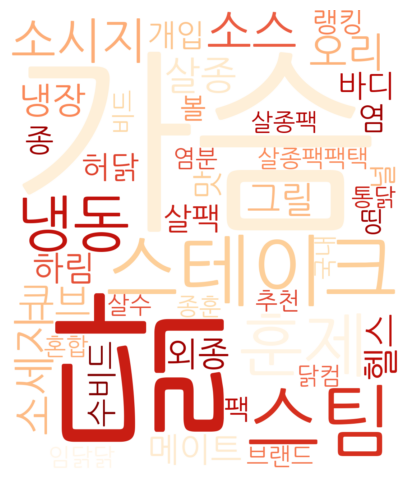

In [118]:
img_path = "C:/박규영/2023크롤링공부/chicken.png"

flower_mask = np.array(Image.open(img_path))

wordcloud = WordCloud(font_path = "C:/박규영/2023크롤링공부/NanumGothic.ttf",
                       colormap = 'OrRd',
                       background_color = 'white', mask = flower_mask)

wc = wordcloud.generate_from_frequencies(temp_dic)
plt.figure(figsize=(5,10))
plt.imshow(wc)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show();